# 5) Feature Selection & Engineering 
Analyse der Korrelationen und Kausalitäten, Identifikation der Features (erklärende Variablen),
ggf. Optimierung der Datengrundlage

## 5.1 Importieren der Bibliotheken 

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## 5.2 Laden des Datensatzes

In [2]:
file_path = "data/wine_quality_processed.csv"

# Prüfen, ob die Datei existiert
if os.path.exists(file_path):
    print("File found! Loading...")
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
    print(f"Shape of the dataset: {data.shape}")
    display(data.head())
else:
    print(f"File not found at: {file_path}")

File found! Loading...
Dataset loaded successfully.
Shape of the dataset: (6497, 14)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Okay
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Okay
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Okay
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Okay
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Okay


## 5.3 Korrelationen analysieren

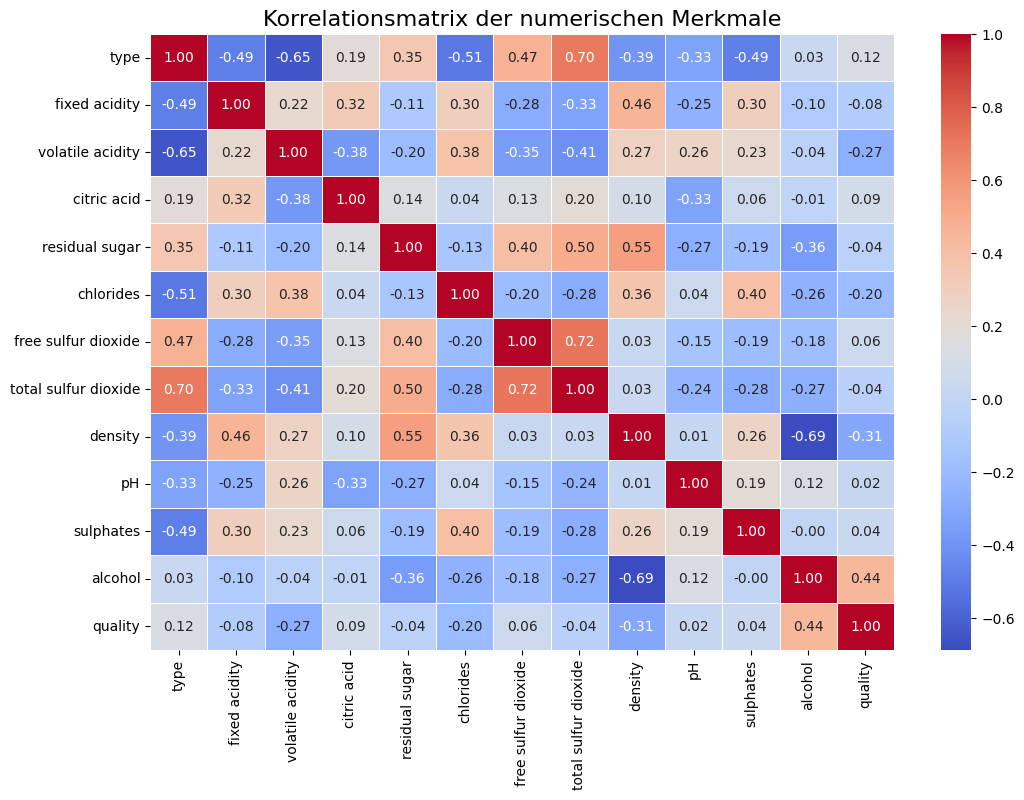


Korrelationen mit der Zielvariablen 'quality':

quality                 1.000000
alcohol                 0.444319
type                    0.119323
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


In [3]:
# Auswahl nur numerischer Spalten
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Korrelationsmatrix für numerische Spalten
corr_matrix = numerical_data.corr()

# Visualisierung der Korrelationsmatrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Korrelationsmatrix der numerischen Merkmale", fontsize=16)
plt.show()

# Fokus auf die Zielvariable (z. B. 'quality')
print("\nKorrelationen mit der Zielvariablen 'quality':\n")
print(corr_matrix['quality'].sort_values(ascending=False))

## 5.4 Interpretation zwischen den Features und der Zielvariablen quality:

1) Stark korrelierte Features:
    - alcohol (0.444): Zeigt eine positive und moderate Korrelation mit der Qualität. Ein höherer Alkoholgehalt scheint tendenziell mit einer besseren Weinqualität verbunden zu sein.

2) Schwach positiv korrelierte Features:
    - type (0.119): Der Weintyp hat eine leichte, aber positive Beziehung zur Qualität. Dies könnte auf subtile Unterschiede zwischen Rot- und Weißweinen hinweisen.
    - citric acid (0.086), free sulfur dioxide (0.055), sulphates (0.038): Diese chemischen Eigenschaften haben eine sehr schwache positive Korrelation zur Qualität. Sie könnten indirekt durch andere Merkmale beeinflusst werden.

3) Nahezu unkorrelierte Features:
    - pH (0.019): Praktisch keine Korrelation mit der Weinqualität, daher vermutlich wenig informativ für das Modell.
    - residual sugar (-0.037) und total sulfur dioxide (-0.041): Sehr geringe Korrelationen, negativ und kaum relevant.
    
4) Schwach negativ korrelierte Features:
    - fixed acidity (-0.077): Eine leicht negative Beziehung zur Qualität, was auf eine möglicherweise geringe Bedeutung hindeutet.
    - chlorides (-0.201): Eine schwach negative Korrelation, was auf eine tendenziell schlechtere Qualität bei einem höheren Chloridgehalt hinweist.

5) Moderate negative Korrelationen:
    - volatile acidity (-0.266): Zeigt, dass höhere flüchtige Säurewerte mit einer schlechteren Qualität verbunden sind, was relevant sein könnte.
    - density (-0.306): Die Dichte weist eine moderate negative Korrelation auf, was bedeuten könnte, dass dichtere Weine tendenziell als weniger hochwertig empfunden werden.

6) Zusammenfassung:
    - Wichtige Features: alcohol, density, volatile acidity und möglicherweise chlorides sollten priorisiert werden, da sie die stärkste Korrelation mit der Zielvariablen aufweisen.
    - Weniger relevante Features: pH, residual sugar, total sulfur dioxide, und fixed acidity scheinen wenig oder keinen Einfluss auf die Weinqualität zu haben und könnten für die Modellierung weniger bedeutsam sein.

Diese Interpretation gibt eine Richtung vor, welche Features beim Modellieren priorisiert oder entfernt werden könnten, um ein effizienteres Modell zu erstellen.

## 5.5 Datensatz für Modelierung abspeichern

In [9]:
import os
import pandas as pd

# Relativer Pfad zur Eingabedatei
input_file = "data/wine_quality_processed.csv"
output_directory = "model"
output_file = "wine_quality.csv"

# Absoluten Pfad prüfen (nur für Debugging)
print(f"Absoluter Pfad der Eingabedatei: {os.path.abspath(input_file)}")

# Sicherstellen, dass die Datei existiert
if not os.path.exists(input_file):
    raise FileNotFoundError(f"Die Datei '{input_file}' wurde nicht gefunden. Bitte überprüfe den Pfad.")

# Sicherstellen, dass das Zielverzeichnis existiert
os.makedirs(output_directory, exist_ok=True)

# Datei laden
data = pd.read_csv(input_file)
print(f"Datei '{input_file}' erfolgreich geladen.")

# Datei speichern
output_path = os.path.join(output_directory, output_file)
data.to_csv(output_path, index=False)
print(f"Datei erfolgreich gespeichert unter '{output_path}'.")

Absoluter Pfad der Eingabedatei: /Users/lvs/Documents/wine-quality-project/data/wine_quality_processed.csv
Datei 'data/wine_quality_processed.csv' erfolgreich geladen.
Datei erfolgreich gespeichert unter 'model/wine_quality.csv'.


## 5.6 Next Steps:
- Anwendung in Machine Learning: Entwicklung von Regressions- oder Klassifikationsmodellen,
Performance-Vergleich und –Interpretation 
- Empfohlene Vorgehensweise:
    -Automatische Selektion: Wenn du dir unsicher bist, nutze Feature-Selection-Methoden (wie Lasso oder RFE), um Features basierend auf Daten und Modellanforderungen auszuwählen.

- Iterativer Ansatz:
    - Erste Modelliteration: Trainiere ein Modell mit allen Features, um die Basisleistung zu messen.
    - Optimierung: Entferne Features, die nachweislich keinen Beitrag leisten (z. B. durch geringe Korrelation oder niedrige Gewichtung im Modell).
    - Finales Modell: Nutze nur die wichtigsten Features.